# Interpolacija funkcija

---

Neka je zadana funkcija $f(x)$ na intervalu $[a,b]$.

Odaberimo $n+1$ točku $x_i, i=0,\ldots, n$, u intervalu $[a,b]$ tako da je $x_i\neq x_j$
te kroz točke $T_i=(x_i,f(x_i))$ provucimo interpolacijski polinom.

__Teorem.__ Za svaku točku $x\in[a,b]$ vrijedi __ocjena pogreške__ (uz pretpostavku da funkcija $f$ ima $n+1$ derivaciju) 

\begin{align*}
f(x)-p_n(x)&=\frac{\omega(x)}{(n+1)!} \,f^{(n+1)}(\xi), \\
\omega(x)&=\prod_{k=0}^n (x-x_k)=(x-x_0)(x-x_1)\cdots (x-x_n),\quad  \xi \in (a,b).\tag{1}
\end{align*}

_Dokaz._ (Vidi [Numerička matematika, str. 23][RS04].) 

Za $x=x_i$,  tvrdnja je očigledna. U suprotnom, definirajmo pomoćnu funkciju 

$$g(y)= f(y)-p_n(y)-k\omega(y),$$

pri čemu je konstanta $k$ odabrana tako da je $g(x)=0$.
Na taj način funkcija $g$ ima barem $n+2$ nultočke, 
$x,x_0,x_1,\ldots,x_n$. 
Prema Rolleovom teoremu, derivacija $g'$ ima barem $n+1$ nultočku, $g''$ ima barem $n$ nultočaka, itd. Funkcija $g^{(n+1)}$ ima barem jednu nultočku $\xi\in(a,b)$.

Vrijedi $p_n^{(n+1)}(y)=0$ i $\omega^{(n+1)}(y)=(n+1)!$ (vodeći koeficijent od $\omega$ je $1$). Uvrštavanje daje 

$$0=g^{(n+1)}(\xi)=f^{(n+1)}(\xi)-k(n+1)!$$ 

pa je $k=\displaystyle\frac{f^{(n+1)}(\xi)}{(n+1)!}$ i teorem je dokazan.

[RS04]: http://www.mathos.unios.hr/pim/Materijali/Num.pdf "R. Scitovski, 'Numerička matematika', Sveučilište u Osijeku, Osijek, 2004."


## Primjer

Promotrimo funkciju 

$$
f(x)=\sin(x), \quad x\in[0,\pi].
$$

In [1]:
using Polynomials
using Plots

In [2]:
# Ova datoteka omogućuje manipulaciju s Vandermondeovim matricama
include("Vandermonde.jl")

Matrix (generic function with 1 method)

In [3]:
n=6
a=0
b=pi
x=range(a,stop=b,length=n)
f(x)=sin(x)
y=f.(x)

6-element Array{Float64,1}:
 0.0
 0.5877852522924731
 0.9510565162951535
 0.9510565162951536
 0.5877852522924732
 1.2246467991473532e-16

In [4]:
A=Vandermonde(x)

6×6 Vandermonde{Float64}:
 1.0  0.0       0.0        0.0       0.0         0.0
 1.0  0.628319  0.394784   0.24805   0.155855    0.0979263
 1.0  1.25664   1.57914    1.9844    2.49367     3.13364
 1.0  1.88496   3.55306    6.69736  12.6242     23.7961
 1.0  2.51327   6.31655   15.8752   39.8988    100.277
 1.0  3.14159   9.8696    31.0063   97.4091    306.02

In [5]:
c=A\y

6-element Array{Float64,1}:
  0.0
  0.9853290520718755
  0.05248115215995268
 -0.23307995080786387
  0.03709582630668529
  4.605791373257752e-16

In [6]:
p=Polynomial(c)

Polynomial(0.9853290520718755*x + 0.05248115215995268*x^2 - 0.23307995080786387*x^3 + 0.03709582630668529*x^4 + 4.605791373257752e-16*x^5)

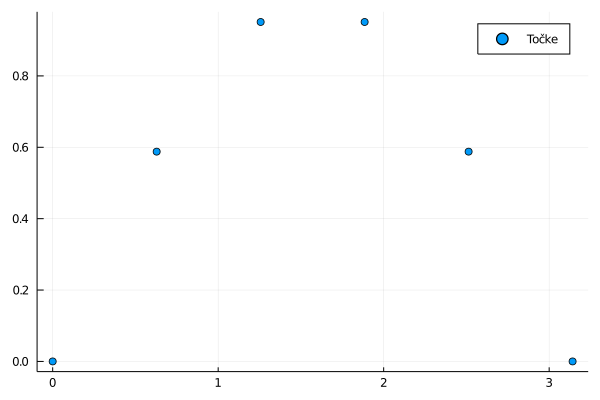

In [7]:
scatter(x,y,label="Točke")

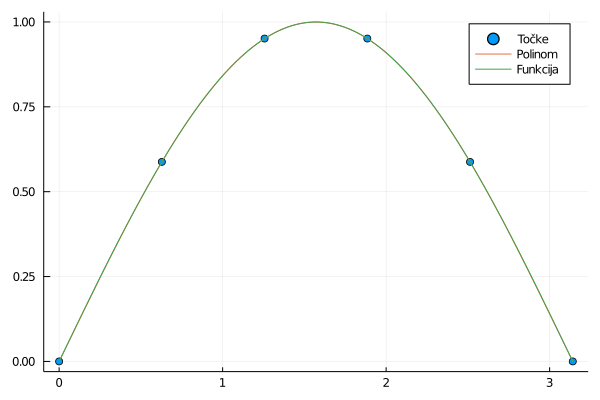

In [8]:
xx=range(a,stop=b,length=100)
pf=p.(xx)
F=f.(xx)
plot!(xx,[pf F],label=["Polinom" "Funkcija"])

In [9]:
# maksimalne apsolutna i relativna pogreška
using LinearAlgebra
norm(pf[2:end-1]-F[2:end-1],Inf), 
norm((pf[2:end-1]-F[2:end-1])./F[2:end-1],Inf)

(0.0013114413107387923, 0.013073445174557961)

## Čebiševljeve točke

__Čebiševljevi polinomi__ su polinomi stupnja $n$ dani formulom

$$
T_n(x)=\cos(n\, \arccos x), \quad n=0,1,2,\ldots
$$

Adiciona formula

$$
\cos(n+1)\varphi+\cos(n-1)\varphi=2\cos\varphi \cos n\varphi
$$

uz $\varphi=\arccos x$ daje rekurzivnu formulu:

\begin{align*}
T_0(x)&=1,\\ 
T_1(x)&=x,\\ 
T_{n+1}(x)&=2\,x\,T_n(x)-T_{n-1}(x), \quad n=1,2,\ldots
\end{align*}

Dakle, 

$$
T_2(x)=2x^2-1,\quad T_3(x)=4x^3-3x, \ldots
$$

Nul-točke polinoma $T_n(x)$ su 

$$
x_k=\cos \bigg(\frac{2k-1}{2n}\pi\bigg), \quad k=1,2,\ldots,n.
$$

Sve nul-točke leže unutar intervala $[-1,1]$. U točkama

$$
\xi_k=\cos \bigg(\frac{k\pi}{n}\bigg), \quad k=0,1,2,\ldots,n,
$$

$T_n(x)$ naizmjenično dostiže lokalne minimume i maksimume, $1$ i $-1$, na intervalu $[-1,1]$.

Na intervalu $[-1,1]$ polinom $T_n(x)$ poprima vrijednosti u intervalu $[-1,1]$. 


### Primjer

In [10]:
T(n,x)=cos.(n*acos.(x))

T (generic function with 1 method)

In [11]:
x₁=range(-1,stop=1,length=100)

-1.0:0.020202020202020204:1.0

In [12]:
y₁=T(10,x₁)

100-element Array{Float64,1}:
  1.0
 -0.42836153225312495
 -0.9584560557058804
 -0.9366736730458501
 -0.6167928104674381
 -0.17804830738034694
  0.25941075260255697
  0.6213977769092905
  0.8686446239708322
  0.9876008507032885
  0.9828587890060783
  0.8710045668808767
  0.6757118803364269
  ⋮
  0.8710045668808764
  0.9828587890060785
  0.9876008507032882
  0.8686446239708325
  0.6213977769092903
  0.25941075260255836
 -0.17804830738034466
 -0.616792810467437
 -0.9366736730458506
 -0.9584560557058798
 -0.42836153225312185
  1.0

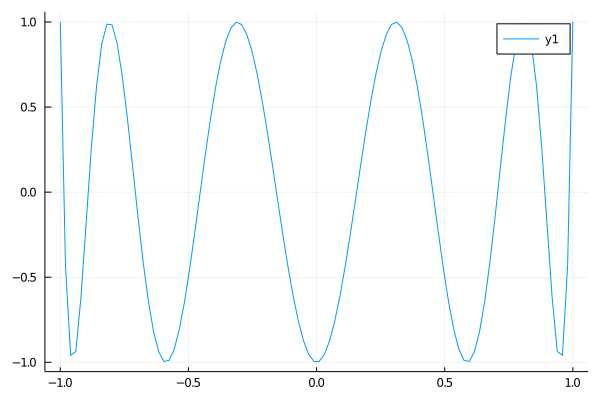

In [13]:
plot(x₁,y₁)

In [14]:
xₙ=[cos((2*k-1)*pi/(2*10)) for k=10:-1:1]

10-element Array{Float64,1}:
 -0.9876883405951377
 -0.8910065241883678
 -0.7071067811865475
 -0.45399049973954675
 -0.1564344650402306
  0.15643446504023092
  0.45399049973954686
  0.7071067811865476
  0.8910065241883679
  0.9876883405951378

In [15]:
yₙ=T(10,xₙ)

10-element Array{Float64,1}:
 -6.492484977390737e-15
 -7.354070601250002e-16
 -2.6948419387607653e-15
 -9.803364199544708e-16
 -2.4499125789312946e-15
  5.51091059616309e-16
 -4.286263797015736e-16
  3.061616997868383e-16
 -1.0718754395722282e-15
  2.7257675990577433e-15

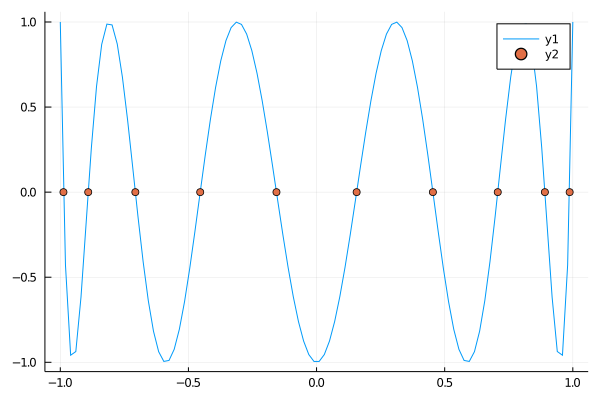

In [16]:
scatter!(xₙ,yₙ)

### Norme funkcija

Za funkcije 

$$f,g:[a,b]\to \mathbb{R}$$

definiramo __skalarni produkt__

$$
(f,g)=\int_a^b f(x)g(x)\, dx
$$

i __težinski skalarni produkt__ s __težinom__ $\omega(x)>0$

$$
(f,g)_\omega=\int_a^b f(x)g(x)\omega(x)\, dx
$$

Funkcije $f$ i $g$ su __ortogonalne__ ako je $(f,g)=0$ ili ako je $(f,g)_\omega=0$.

Sljedeće tri __norme__ su prirodna poopćenja odgovarajućih vektorskih normi:

\begin{align*}
\|f\|_2&=\sqrt{(f,f)}=\sqrt{\int_a^b f^2(x)\, dx} \\
\|f\|_1 &= \int_a^b \big|f(x)\big|\, dx \\
\|f\|_\infty&=\max_{x\in[a,b]} \big|f(x)\big|
\end{align*}

Vrijedi sljedeći važan teorem:

__Teorem__. Od svih polinoma stupnja manjeg ili jednakog $n$ čiji je koeficijent uz najveću potenciju jednak $1$, najmanju 
$\|\cdot\|_\infty$ na intervalu $[-1,1]$ ima upravo polinom 
$\displaystyle\frac{1}{2^{n-1}}T_n(x)$ i ta norma iznosi $\displaystyle\frac{1}{2^{n-1}}$.

_Dokaz_ : (Vidi [Numerička matematika, str. 101][RS04].)

Koeficijent Čebiševljevog polinoma $T_n(x)$ uz potenciju $x^n$ je $2^{n-1}$.
Stoga polinom $\displaystyle\frac{1}{2^{n-1}}T_n(x)$ uz potenciju $x^n$ ima koeficijent $1$. Također, zbog svojstva Čebiševljevih polinoma vrijedi

$$\left| \displaystyle\frac{1}{2^{n-1}}T_n(x) \right| \leq \displaystyle\frac{1}{2^{n-1}}$$

pa je

$$\left\| \displaystyle\frac{1}{2^{n-1}}T_n(x) \right\|_\infty = \displaystyle\frac{1}{2^{n-1}}.$$

Pretpostavimo da za polinom 

$$p_n(x)=x^n + \alpha_{n-1}x^{n-1} +\alpha_{n-2}x^{n-2}+\cdots \alpha_1 x+\alpha_0$$

vrijedi $| p_n(x)|< \displaystyle\frac{1}{2^{n-1}}$ za svaki $x\in[-1,1]$. Neka su $\xi_0,\xi_1,\ldots,\xi_n$ točke u kojima $T_n(x)$ poprima ekstremne vrijednosti $-1$ ili $1$. Vrijedi

$$
\begin{aligned}
p_n(\xi_0) & < \frac{1}{2^{n-1}}T_n(\xi_0) = \frac{1}{2^{n-1}} \cr
p_n(\xi_1) & > \frac{1}{2^{n-1}}T_n(\xi_1) = -\frac{1}{2^{n-1}} \cr
p_n(\xi_2) & < \frac{1}{2^{n-1}}T_n(\xi_2) = \frac{1}{2^{n-1}} \cr
& \vdots
\end{aligned}$$

To bi značilo da polinom $p_n(x)-\frac{1}{2^{n-1}}T_n(x)$ stupnja $n-1$ mijenja predznak $n$ puta, što je nemoguće, pa je teorem dokazan.

[RS04]: http://www.mathos.unios.hr/pim/Materijali/Num.pdf "R. Scitovski, 'Numerička matematika', Sveučilište u Osijeku, Osijek, 2004."

Zaključujemo da će polinomna aproksimacija (1) biti najbolja ako na intervalu $[-1,1]$ 
odaberemo

$$\omega(x)=\frac{1}{2^{n}} T_{n+1}(x),$$ 

odnosno ako na intervalu $[a,b]$ za 
točke interpolacije $x_0,x_1,\ldots,x_n$ odaberemo upravo nul-točke polinoma $T_{n+1}(x)$ preslikane na interval $[a,b]$.

### Promjena intervala

Sustav ortogonalnih funkcija $\Phi_i$ na intervalu $[-1,1]$ pomoću transformacije 

$$
\gamma :[a,b]\to [-1,1],\quad \gamma(x)=\frac{2x}{b-a}-\frac{a+b}{b-a}
$$

prelazi u sustav ortogonalnih funkcija na intervalu $[a,b]$

$$
\Psi_i(x)=\Phi_i(\gamma(x)).
$$

Nama je potrebna inverzna transformacija:

$$
x=\frac{a+b}{2}+\frac{b-a}{2}\gamma(x) .
$$

In [17]:
# Odaberimo za interpolaciju sinusa nultočke polinoma T(n,x)
xc=(a+b)/2 .+(b-a)/2*[cos((2*k-1)*pi/(2*n)) for k=n:-1:1]

6-element Array{Float64,1}:
 0.05352358690370296
 0.46007559225530503
 1.1642443214432945
 1.9773483321464989
 2.681517061334488
 3.0880690666860904

In [18]:
yc=f.(xc)

6-element Array{Float64,1}:
 0.053498035064131755
 0.4440158403262132
 0.9184897712563223
 0.9184897712563223
 0.44401584032621333
 0.05349803506413165

In [19]:
Ac=Vandermonde(xc)
cc=Ac\yc
pc=Polynomial(cc)

Polynomial(0.0005833790342017961 + 0.9866631446414161*x + 0.048880818533717466*x^2 - 0.23105825091075513*x^3 + 0.03677406277461409*x^4 + 5.472737122900648e-18*x^5)

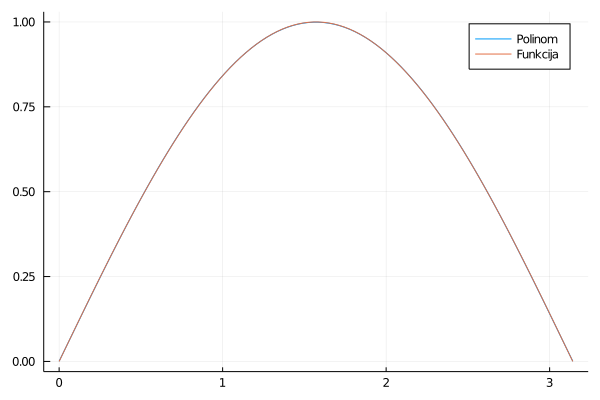

In [20]:
xx=range(a,stop=b,length=100)
pC=pc.(xx)
F=f.(xx)
plot(xx,[pC F],label=["Polinom" "Funkcija"])

In [21]:
# maksimalne apsolutna i relativna pogreška
norm(pC[2:end-1]-F[2:end-1],Inf), 
norm((pC[2:end-1]-F[2:end-1])./F[2:end-1],Inf)

(0.0006090743316026215, 0.006535549604573373)

Pogledajmo kako izgledaju stvarne pogreške u oba slučaja:

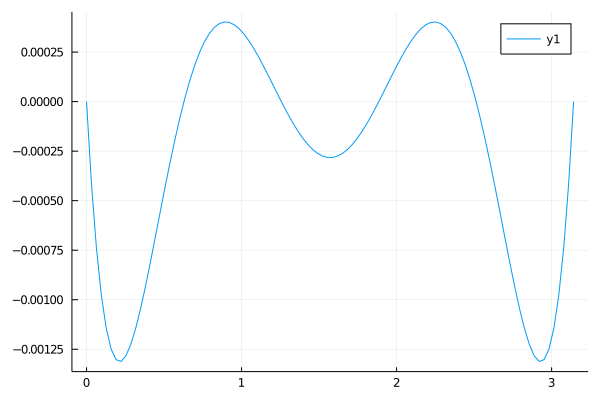

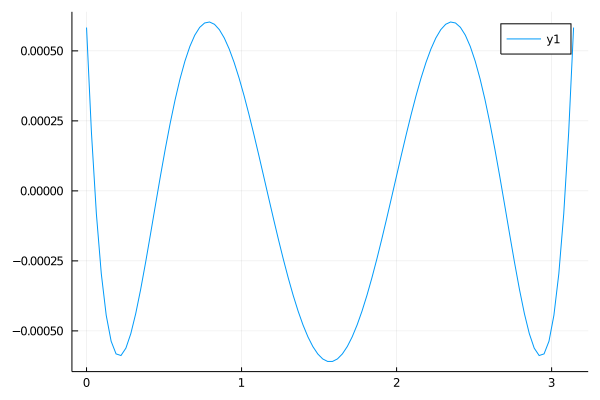

(nothing, nothing)

In [22]:
p₁=plot(xx,pf-F) # ravnomjerno raspoređene točke
p₂=plot(xx,pC-F) # Čebiševljeve točke
display(p₁),display(p₂)

Vidimo da su za Čebiševljeve točke postignute manje pogreške.

__Napomena.__ Ovdje smo, radi jednostavnosti, koristili najmanje točnu varijantu računanja interpolacijskog polinoma.

### Primjer 

Napravimo još jedan zanimljiv primjer (vidi [Numerička matematika, str. 24][RS04]):
interpolirajmo funkciju

$$
f(x)=1-|x-1|,\quad x\in[0,2]
$$

polinomima stupnja 10.

[RS04]: http://www.mathos.unios.hr/pim/Materijali/Num.pdf "R. Scitovski, 'Numerička matematika', Sveučilište u Osijeku, Osijek, 2004."


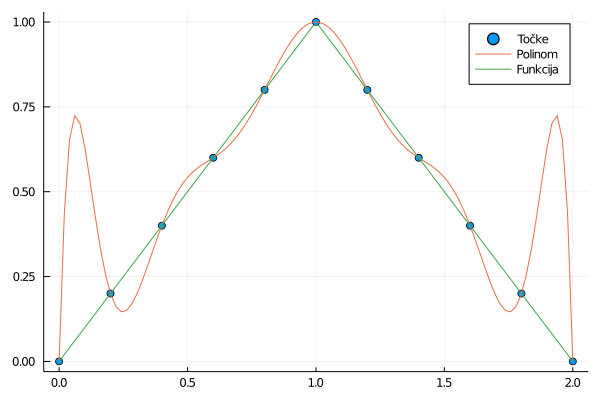

In [23]:
n=11
a=0
b=2
f(x)=1 .-abs.(x .-1)

# Ravnomjerno raspoređene točke
x=range(a,stop=b,length=n)
y=f(x)
A=Vandermonde(x)
c=A\y
p=Polynomial(c)

xx=range(a,stop=b,length=100)
pf=p.(xx)
F=f(xx)
scatter(x,y,label="Točke")
plot!(xx, [pf F], label=["Polinom" "Funkcija"])

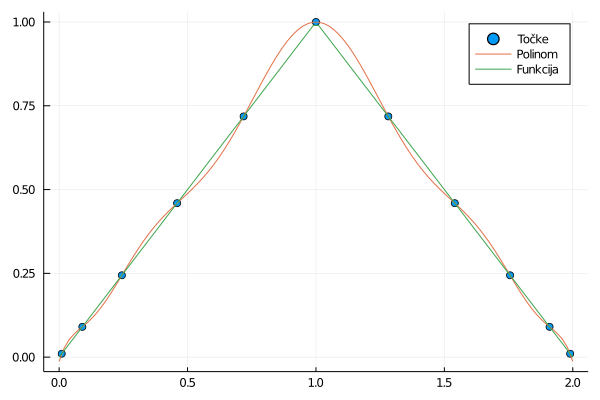

In [24]:
# Čebiševljeve točke
xc=(a+b)/2 .+(b-a)/2*[cos((2*k-1)*pi/(2*n)) for k=n:-1:1]
yc=f(xc)
Ac=Vandermonde(xc)
cc=Ac\yc
pc=Polynomial(cc)
pCheb=pc.(xx)
scatter(xc,yc,label="Točke")
plot!(xx,[pCheb F],label=["Polinom" "Funkcija"])